<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data(y_hat)_add_delta_(1_2)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.2_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,47.660517,95.803559,84.186199,-21.434141,216.216134,234.479966,-18.263832
1,0.0,1.0,46.927130,22.636765,45.545954,-4.466783,120.643068,124.038302,-3.395234
2,0.0,2.0,25.523530,43.119024,74.843289,-18.463047,135.022797,151.885933,-16.863137
3,0.0,3.0,75.686024,72.062532,59.698773,2.180843,219.628172,216.320814,3.307358
4,0.0,4.0,26.478905,99.764033,90.171921,-6.644467,219.770391,221.509344,-1.738953
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,91.740999,26.515966,49.243427,0.943757,178.444149,182.777020,-4.332871
59996,999.0,56.0,61.419512,41.071169,73.984352,8.726493,195.201526,186.828344,8.373182
59997,999.0,57.0,59.137948,44.617236,49.416934,-0.492818,162.679300,164.836464,-2.157164
59998,999.0,58.0,95.563692,49.686049,29.944740,-2.536156,182.658325,190.621644,-7.963319


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    47.660517  95.803559  84.186199 -21.434141  216.216134   
      1.0    46.927130  22.636765  45.545954  -4.466783  120.643068   
      2.0    25.523530  43.119024  74.843289 -18.463047  135.022797   
      3.0    75.686024  72.062532  59.698773   2.180843  219.628172   
      4.0    26.478905  99.764033  90.171921  -6.644467  219.770391   
...                ...        ...        ...        ...         ...   
999.0 55.0   91.740999  26.515966  49.243427   0.943757  178.444149   
      56.0   61.419512  41.071169  73.984352   8.726493  195.201526   
      57.0   59.137948  44.617236  49.416934  -0.492818  162.679300   
      58.0   95.563692  49.686049  29.944740  -2.536156  182.658325   
      59.0   91.848900  60.296155  82.662727   2.152280  246.960062   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    234.479966 -18.263832  
      1.0    124.038302  -3.395234  
      2.0    151.885933 -16.863137  
      3.0    216.320814   3.307358  
      4.0    221.509344  -1.738953  
...                 ...        ...  
999.0 55.0   182.777020  -4.332871  
      56.0   186.828344   8.373182  
      57.0   164.836464  -2.157164  
      58.0   190.621644  -7.963319  
      59.0   245.613456   1.346606  

[60000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    47.660517  95.803559  84.186199 -21.434141  216.216134   
      1.0    46.927130  22.636765  45.545954  -4.466783  120.643068   
      2.0    25.523530  43.119024  74.843289 -18.463047  135.022797   
      3.0    75.686024  72.062532  59.698773   2.180843  219.628172   
      4.0    26.478905  99.764033  90.171921  -6.644467  219.770391   
...                ...        ...        ...        ...         ...   
999.0 55.0   91.740999  26.515966  49.243427   0.943757  178.444149   
      56.0   61.419512  41.071169  73.984352   8.726493  195.201526   
      57.0   59.137948  44.617236  49.416934  -0.492818  162.679300   
      58.0   95.563692  49.686049  29.944740  -2.536156  182.658325   
      59.0   91.848900  60.296155  82.662727   2.152280  246.960062   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    234.479966 -18.263832  
      1.0    124.038302  -3.395234  
      2.0    151.885933 -16.863137  
      3.0    216.320814   3.307358  
      4.0    221.509344  -1.738953  
...                 ...        ...  
999.0 55.0   182.777020  -4.332871  
      56.0   186.828344   8.373182  
      57.0   164.836464  -2.157164  
      58.0   190.621644  -7.963319  
      59.0   245.613456   1.346606  

[60000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,47.660517,95.803559,84.186199,-21.434141,216.216134,234.479966,-18.263832
1,0.0,1.0,46.927130,22.636765,45.545954,-4.466783,120.643068,124.038302,-3.395234
2,0.0,2.0,25.523530,43.119024,74.843289,-18.463047,135.022797,151.885933,-16.863137
3,0.0,3.0,75.686024,72.062532,59.698773,2.180843,219.628172,216.320814,3.307358
4,0.0,4.0,26.478905,99.764033,90.171921,-6.644467,219.770391,221.509344,-1.738953
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,91.740999,26.515966,49.243427,0.943757,178.444149,182.777020,-4.332871
59996,999.0,56.0,61.419512,41.071169,73.984352,8.726493,195.201526,186.828344,8.373182
59997,999.0,57.0,59.137948,44.617236,49.416934,-0.492818,162.679300,164.836464,-2.157164
59998,999.0,58.0,95.563692,49.686049,29.944740,-2.536156,182.658325,190.621644,-7.963319


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    47.660517  95.803559  84.186199 -21.434141  216.216134   
      1.0    46.927130  22.636765  45.545954  -4.466783  120.643068   
      2.0    25.523530  43.119024  74.843289 -18.463047  135.022797   
      3.0    75.686024  72.062532  59.698773   2.180843  219.628172   
      4.0    26.478905  99.764033  90.171921  -6.644467  219.770391   
...                ...        ...        ...        ...         ...   
999.0 55.0   91.740999  26.515966  49.243427   0.943757  178.444149   
      56.0   61.419512  41.071169  73.984352   8.726493  195.201526   
      57.0   59.137948  44.617236  49.416934  -0.492818  162.679300   
      58.0   95.563692  49.686049  29.944740  -2.536156  182.658325   
      59.0   91.848900  60.296155  82.662727   2.152280  246.960062   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    234.479966 -18.263832  
      1.0    124.038302  -3.395234  
      2.0    151.885933 -16.863137  
      3.0    216.320814   3.307358  
      4.0    221.509344  -1.738953  
...                 ...        ...  
999.0 55.0   182.777020  -4.332871  
      56.0   186.828344   8.373182  
      57.0   164.836464  -2.157164  
      58.0   190.621644  -7.963319  
      59.0   245.613456   1.346606  

[60000 rows x 7 columns]

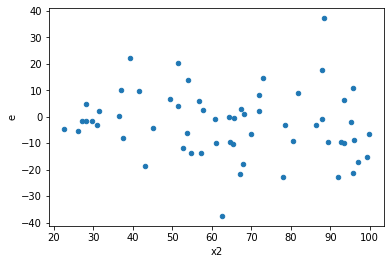

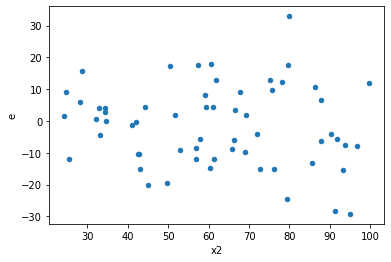

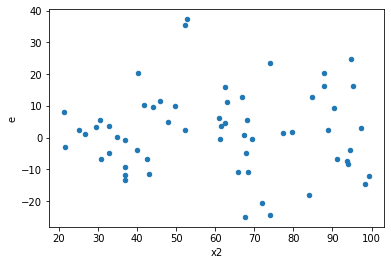

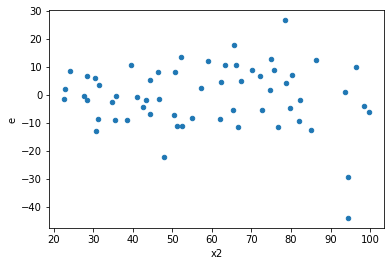

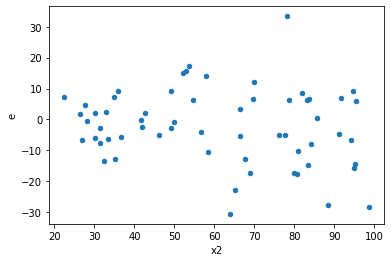

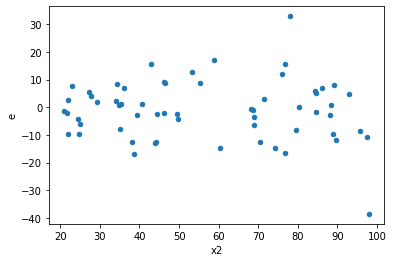

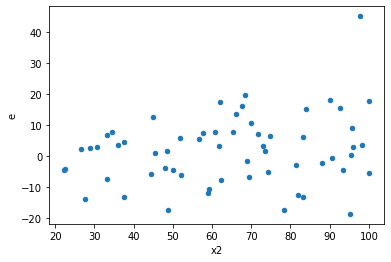

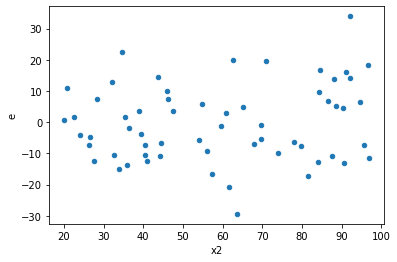

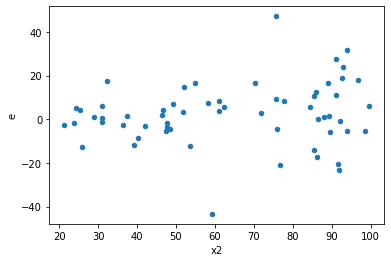

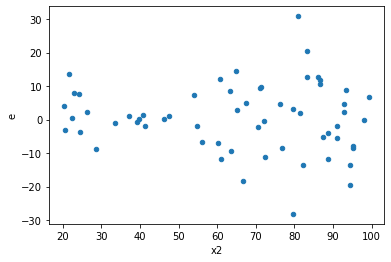

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,22.0,32.0,2672.482411942985,5888.429198497161,121.47647327013568,184.0134124530363,1.5148070033596783,0.2781407596684029,0.8609296201657985,0.13907037983420145,Reject001=1 : Homoscedasticity
2.0,17.0,37.0,2358.3737228970876,7325.262484691832,138.72786605276985,197.9800671538333,1.42711102525375,0.3584973613147322,0.8207513193426339,0.1792486806573661,Reject001=1 : Homoscedasticity
5.0,25.0,29.0,2228.7836874840073,3660.2978482475855,89.15134749936028,126.21716718095122,1.4157628652988885,0.3661836879907352,0.8169081560046324,0.1830918439953676,Reject001=1 : Homoscedasticity
11.0,30.0,24.0,3407.4544643644695,3145.4607167595477,113.58181547881564,131.06086319831448,1.153889490547533,0.7258722151106924,0.6370638924446538,0.3629361075553462,Reject001=1 : Homoscedasticity
12.0,32.0,22.0,4322.141374063529,3175.0580473542786,135.06691793948528,144.3208203342854,1.068513463814627,0.8863327542282782,0.5568336228858609,0.4431663771141391,Reject001=1 : Homoscedasticity
15.0,14.0,40.0,576.5093628523562,6739.278189361451,41.179240203739724,168.48195473403626,4.0914294168724235,0.00045248028223543457,0.9997737598588823,0.00022624014111771729,Reject001=0 : Heteroscedasticity
19.0,25.0,29.0,2616.859876650793,3824.623268342442,104.67439506603172,131.88356097732557,1.2599409902883079,0.5460025766283836,0.7269987116858082,0.2730012883141918,Reject001=1 : Homoscedasticity
21.0,38.0,16.0,4516.353178813416,4149.962322071516,118.85139944245832,259.37264512946973,2.182327228338986,0.0952394708515436,0.9523802645742282,0.0476197354257718,Reject001=1 : Homoscedasticity
25.0,32.0,22.0,4334.068462940032,4384.554605448018,135.439639466876,199.29793661127357,1.4714889776416982,0.34800782436262345,0.8259960878186883,0.17400391218131173,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,33.0,21.0,7128.937312870218,1420.5448380087746,216.02840342030964,67.64499228613212,0.3131300848181548,0.0027986334285035183,Reject001=0 : Heteroscedasticity
1.0,22.0,32.0,2672.482411942985,5888.429198497161,121.47647327013568,184.0134124530363,1.5148070033596783,0.2781407596684029,Reject001=1 : Homoscedasticity
2.0,17.0,37.0,2358.3737228970876,7325.262484691832,138.72786605276985,197.9800671538333,1.42711102525375,0.3584973613147322,Reject001=1 : Homoscedasticity
3.0,22.0,32.0,4263.594578229256,2337.8028276347645,193.79975355587524,73.05633836358639,0.3769681695829567,0.019725680015553068,Reject001=1 : Homoscedasticity
4.0,23.0,31.0,3667.375886109019,3864.6022606674783,159.45112548300082,124.66458905378963,0.7818357423076339,0.54674967110218,Reject001=1 : Homoscedasticity
5.0,25.0,29.0,2228.7836874840073,3660.2978482475855,89.15134749936028,126.21716718095122,1.4157628652988885,0.3661836879907352,Reject001=1 : Homoscedasticity
6.0,31.0,23.0,4070.6373395703986,2402.065842484715,131.31088192162576,104.4376453254224,0.795346461748365,0.545273491451162,Reject001=1 : Homoscedasticity
7.0,32.0,22.0,4965.845975336676,2272.371726001986,155.18268672927113,103.28962390918119,0.6656001779978096,0.28760287297687515,Reject001=1 : Homoscedasticity
8.0,37.0,17.0,8904.248832432522,1850.7771623111648,240.65537384952762,108.86924484183322,0.45238651063701113,0.04346157874274361,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      897
Reject001=0 : Heteroscedasticity    103
Name: Result_test, dtype: int64